In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def convert_to_numeric(c):
    """
    hellper function for the pre-processing part
    """
    try:
        return pd.to_numeric(c)
    except:
        return c

In [3]:
def pre_processing_csv_file(csv_path):
    """
    read csv file, and preform pre-processing
    """
    first_actual_row = 59  # all previous rows are some irrelevant metadata
    df = pd.read_csv(csv_path, encoding='ISO-8859-1', header=None)
    temp_df = df.drop(df.index[:first_actual_row]).reset_index(drop=True)
    temp_df.dropna(how='any', axis=0)
    df = temp_df.T  # make patients as rows and [Class, IDs, and genes] as columns, for better readability
    column_names = df.iloc[0]  # get column names
    df = df[1:]  # don't include headers row in data
    df.columns = column_names
    df = df.apply(convert_to_numeric)
    df_dtypes = df.dtypes
    return df_dtypes, df

In [4]:
"""
pre-processing data
"""
# Get path to data file
# Asssumption: data file and notebook are in the same folder
filename = 'AMI_GSE66360_series_matrix.csv'
csv_path = os.path.join(os.getcwd(), filename)

# Preprocess data
df_dtypes, df = pre_processing_csv_file(csv_path)

<ipython-input-3-a6e94f5b3378>:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='ISO-8859-1', header=None)


In [5]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


In [6]:
df_dtypes

0
Class               object
ID_REF              object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

3. Analysis

a. High level description of the data and some pre-processing

1) How many genes profiled?

In [7]:
# amount of genes == (amount of columns minus the two first columns: "Class" & "ID_REF")
amount_of_columns = df.shape[1]
amount_of_non_gene_columns = 2
amount_of_gene_columns = amount_of_columns - amount_of_non_gene_columns
curr_string = 'The amount of genes profiled is ' + str(amount_of_gene_columns)
print(curr_string)

The amount of genes profiled is 54675


2) How many samples (subjects/patients) in total?

In [8]:
# amount of patients == amount of rows
amount_of_rows = df.shape[0]
curr_string = 'The amount of samples (subjects/patients) in total is ' + str(amount_of_rows)
print(curr_string)

The amount of samples (subjects/patients) in total is 99


3) How many samples in each class?

In [9]:
count_df = df['Class'].value_counts()
print(count_df)

H    50
M    49
Name: Class, dtype: int64


Text(0.5, 1.0, 'Histogram of amount class')

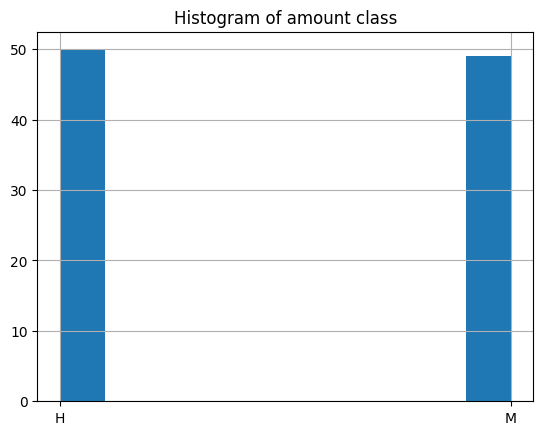

In [10]:
hist = df['Class'].hist()
plt.title('Histogram of amount class')

4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?

In [11]:
# Note: we transposed the matrix, and so each gene is now represented as a column and not a row.
initial_amount_of_gene_columns = amount_of_gene_columns

# we remove all columns (genes) with missing values
df.dropna(axis='columns', inplace=True) # Removing columns with missing values

# get new amount of gene columns
new_amount_of_columns = df.shape[1]
assert 'Class' in df.columns
assert 'ID_REF' in df.columns
new_amount_of_gene_columns = new_amount_of_columns - amount_of_non_gene_columns  # we know that the non-gene columns persisted

# get amount of columns removed
amount_of_columns_with_missing_values = initial_amount_of_gene_columns - new_amount_of_gene_columns

# print
print(f'Original amount of columns {amount_of_columns}')
print(f'Original amount of gene columns {initial_amount_of_gene_columns}')
print(f'Amount of columns removed is {amount_of_columns_with_missing_values}')
print(f'New amount of columns {new_amount_of_columns}')
print(f'New amount of gene columns {new_amount_of_gene_columns}')

Original amount of columns 54677
Original amount of gene columns 54675
Amount of columns removed is 47
New amount of columns 54630
New amount of gene columns 54628


In [12]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


5) Pick 20 genes at random. Draw 20 pair boxplots in one
figure comparing expression levels of each of these genes
in the two classes M and H.

In [13]:
import seaborn as sns
def generate_pair_box_plot_new(df: pd.DataFrame):
    df_20_random_features = df.sample(20, axis=1)
    df_20_random_features['label'] = df['Class']

    df_long = pd.melt(df_20_random_features, 'label', var_name="Gene Name", value_name="Gene Exp Value")
    df_long['Gene Expression Value'] = df_long['Gene Exp Value'].astype(float)

    plt.figure(0, figsize=(15,15))
    sns.boxplot(y="Gene Name", x="Gene Expression Value", hue='label', data=df_long, orient="h")
    plt.show()

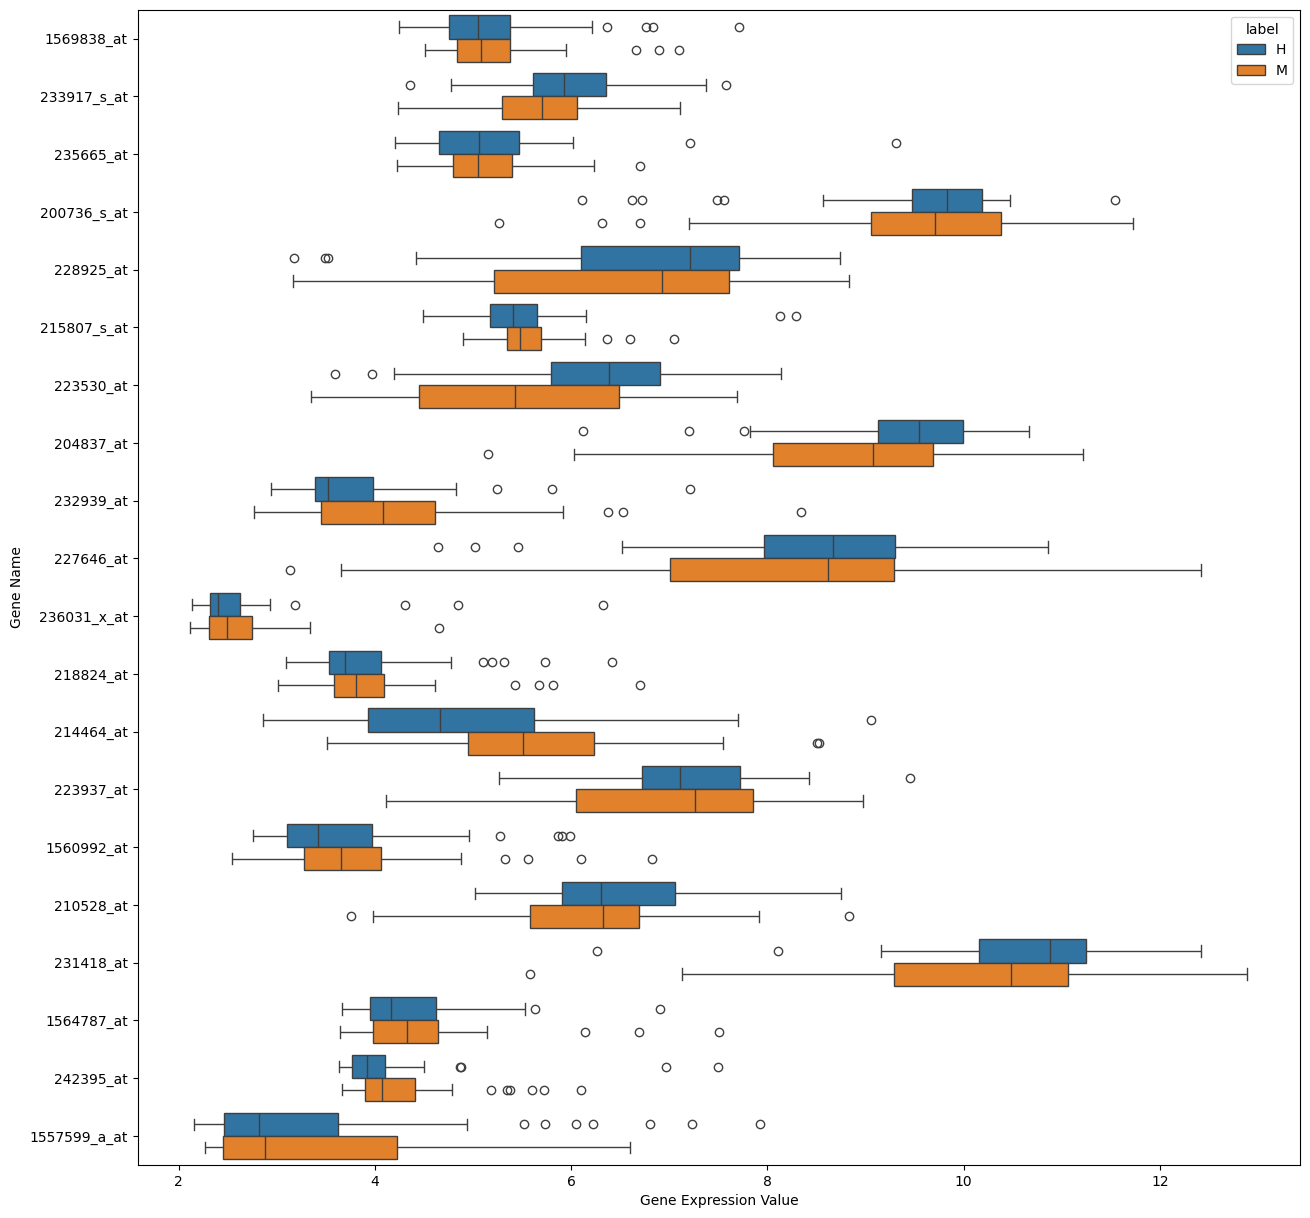

In [14]:

generate_pair_box_plot_new(df)

b. WRS for differential expression (DE)

1) Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?

1. As we learned in class, the expected sum of ranks will be $\frac{(1 + 99)}{2}Size(M)=50*49 = 2450$

$B = |M| + |H|$<br>
$μ_T = |M|(B+1)/2 $

In [15]:
H_samples = df.loc[df['Class'] == 'H']
M_samples = df.loc[df['Class'] == 'M']

H_samples_count = len(H_samples)
M_samples_count = len(M_samples)

B = H_samples_count + M_samples_count
excepted_mue_T = ((M_samples_count)*(B+1))/(2)
curr_string = 'The Excepted value is ' + str(excepted_mue_T)
print(curr_string)

The Excepted value is 2450.0


2) Denote this sum of ranks by RS(g). What is the maximal value, c,
that RS(g) can take?

2. The maximal value will be reached if the values are top ranked, meaning $RS(g)=\sum_{i=51}^{99}i=(49*150) / 2 = 3675$

In [16]:

maximum_R_s = np.sum(np.arange(H_samples_count+1, B+1))
curr_string = 'The Maximum RS value is ' + str(maximum_R_s)
print(curr_string)

The Maximum RS value is 3675


3) Under the null model, what is the probability of RS(g) = c?
(Provide a formula for this and explain it)

3. Since $RS(g)=c=3675$ is the maximal sum of ranks of g's expression levels measured for samples labeled M, there is only one senario as mentioned in the previous section. Under the null model each senario has the same probability, therefore $P(RS(g) = c) = \frac{1}{99 \choose 49}$

$p(RS(g) = c) = |M|!/$$B \choose |M|$$|M|! = 1/$$B \choose |M|$$ = 1/$  $99 \choose 49$

In [17]:
from scipy.special import comb
denominator = comb(B, M_samples_count, exact=True)
probability = 1 / denominator
print(f'P(RS(g)=c) = {probability}')

P(RS(g)=c) = 1.9823306042836678e-29


4) Under the null model, what is the probability of RS(g) = c-1? what is
the probability of RS(g) = c-2?
(Provide formulas and explain them)

4. Similarly to the previous section, $RS(g)=c-1=3675$ could be the sum of ranks with only one senario, where the ranks are the following: $(r_1, r_2, ..., r_{47}, r_{48}, r_{49}) = (99, 98, ..., 53, 52, 50)$ and we have that $RS(g)=3675-51+50=3674$. therefore $P(RS(g) = c-1) = \frac{1}{99 \choose 49}$

However, there are only two senarios where $RS(g)=c-2=3673$:
The first senario: $(r_1, r_2, ..., r_{47}, r_{48}, r_{49}) = (99, 98, ..., 53, 52, 49)$ and we have that $RS(g)=3675-51+49=3673$.

The second senario: $(r_1, r_2, ..., r_{47}, r_{48}, r_{49}) = (99, 98, ..., 53, 51, 50)$ and we have that $RS(g)=3675-52 - 51 + 51 + 50=3673$.
Therefore $P(RS(g) = c-2) = \frac{2}{99 \choose 49}$

$p(RS(g) = c - 1) = 1*|M|!/$$B \choose |M|$$|M|!$$= 1/$$B \choose |M|$<br>
$p(RS(g) = c - 2) = 2*|M|!/$$B \choose |M|$$|M|!$$= 2/$$B \choose |M|$

In [18]:
import math
denominator = comb(B, M_samples_count, exact=True)
probability_case1 = math.factorial(1) / denominator
print(f'P(RS(g)=c-1) = {probability_case1}')

P(RS(g)=c-1) = 1.9823306042836678e-29


In [19]:
denominator = comb(B, M_samples_count, exact=True)
probability_case2 = math.factorial(2) / denominator
print(f'P(RS(g)=c-2) = {probability_case2}')

P(RS(g)=c-2) = 3.9646612085673355e-29


5) Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up). Compute the
IQR for this distribution and present it on the plot with the histogram.

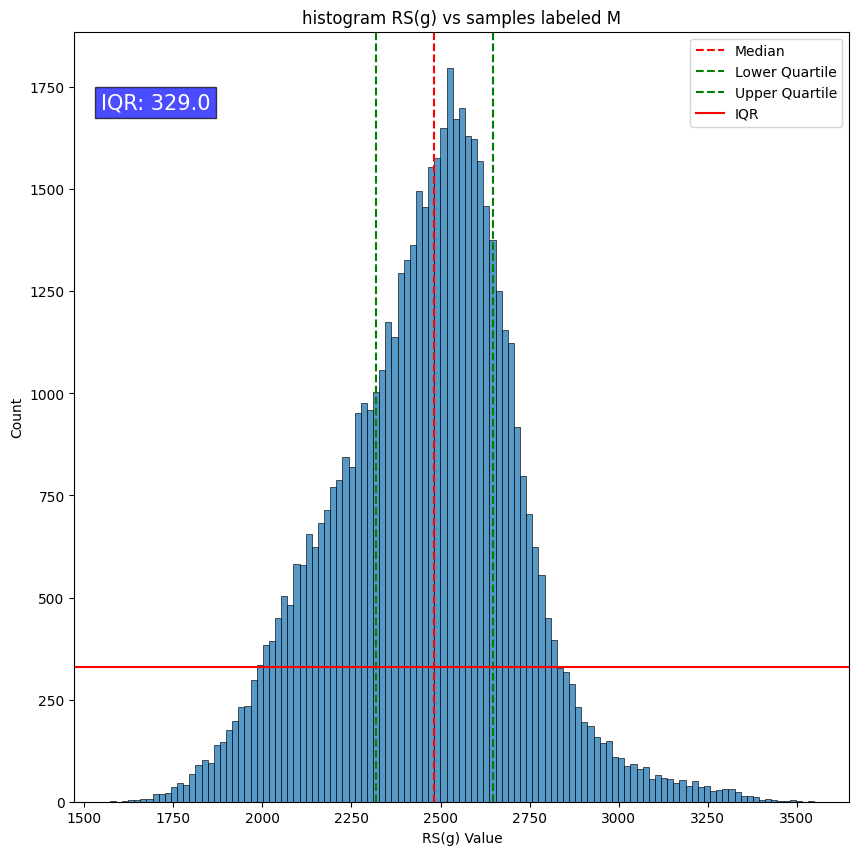

In [20]:
import scipy.stats as stats

def calculate_RS_for_each_gene(gene):
    """
    Calculate the RS sum for a single gene
    """
    # get ranks of all samples for this gene g
    ranks = gene.rank()
    # sum of the ranks of ONLY the 'M' samples for this gene g
    M_samples = df['Class'] == 'M'
    ranks_sums = ranks[M_samples].sum()
    return ranks_sums

plt.figure(0, figsize=(10,10))
plt.title('histogram RS(g) vs samples labeled M')
plt.ylabel('Count')
plt.xlabel('RS(g) Value')

# generate RS value for each gene
ranked_sum_series = df.iloc[:, 2:].apply(calculate_RS_for_each_gene, axis=0)

# plot histogram
sns.histplot(ranked_sum_series)

# calculate IQR
distribution_iqr = stats.iqr(ranked_sum_series)

# plot IQR
plt.axvline(np.median(ranked_sum_series), color='r', linestyle='--', label='Median')
plt.axvline(np.median(ranked_sum_series) - distribution_iqr/2, color='g', linestyle='--', label='Lower Quartile')
plt.axvline(np.median(ranked_sum_series) + distribution_iqr/2, color='g', linestyle='--', label='Upper Quartile')
plt.axhline(y=distribution_iqr, color='r', linestyle='-', label='IQR')
max_y = plt.gca().get_ylim()[1]
min_x = plt.gca().get_xlim()[0]
plt.text(min_x * 1.05, max_y * 0.9, f'IQR: {distribution_iqr}', color='w', size=15, bbox=dict(facecolor='b', alpha=0.7))


plt.legend()
plt.show()



c. Differential Expression
The purpose is to determine the statistical significance of
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene,
using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at
a p-value better (≤) than 0.07 and separately genes
underexpressed in M vs H (M < H) at a p-value better than 0.07.
For both directions use both a Student t-test and a WRS test.

In [21]:
def calculate_t_test(g):
    """
    Calculate the T-test for the means of two
    independent samples of scores
    """
    M_samples = df['Class'] == 'M'
    H_samples = df['Class'] == 'H'
    return stats.ttest_ind(g[M_samples], g[H_samples], equal_var=True)

alpha = 0.07 # certainty of 93%

"""
starting from index 2 which is the first gene
(0 is "Class" and 1 is "ID")
"""
# for each gene calulate t-test and p-value
t_test_df = df.iloc[:,2:].apply(calculate_t_test, axis=0, result_type='expand')
t_test_df.index=['t_test', 'p-value']
t_test_df = t_test_df.T
t_test_df

,t_test,p-value
0,,
1007_s_at,-1.278585,0.204094
1053_at,0.447602,0.655439
117_at,4.041393,0.000106
121_at,0.102599,0.918493
1255_g_at,0.481005,0.631596
...,...,...
AFFX-ThrX-5_at,1.108412,0.270425
AFFX-ThrX-M_at,0.961627,0.338628
AFFX-TrpnX-3_at,1.051736,0.295534


In [22]:
t_test_values = t_test_df['t_test'] # The calculated t-statistic
t_test_p_values = t_test_df['p-value'] / 2  # Since "ttest_ind()" returns the 2-tailed p-value of the test, we divide the values by 2 ("...a two-sided test for the null hypothesis")

t_test_overexpressed_genes_df = t_test_df[(t_test_values > 0) & (t_test_p_values <= alpha)]
t_test_underexpressed_genes_df = t_test_df[(t_test_values <= 0) & (t_test_p_values <= alpha)]
t_test_underexpressed_genes_df

,t_test,p-value
0,,
1316_at,-2.885473,0.004817
1405_i_at,-2.154836,0.033650
1431_at,-4.055713,0.000101
1552277_a_at,-2.952385,0.003955
1552280_at,-2.036412,0.044435
...,...,...
65472_at,-2.446916,0.016208
65585_at,-3.430729,0.000886
81811_at,-2.070764,0.041037


In [23]:
t_test_overexpressed_genes_df

,t_test,p-value
0,,
117_at,4.041393,0.000106
1320_at,2.406316,0.018008
1552276_a_at,2.210267,0.029438
1552289_a_at,1.491806,0.138995
1552293_at,2.123148,0.036287
...,...,...
AFFX-M27830_5_at,1.946407,0.054499
AFFX-M27830_M_at,1.822695,0.071430
AFFX-PheX-3_at,1.575338,0.118434


In [24]:
def calculate_WRS(g):
    """
    Calculate the WRS for two
    independent samples of scores
    """
    M_samples = df['Class'] == 'M'
    H_samples = df['Class'] == 'H'
    return stats.ranksums(g[M_samples], g[H_samples])

"""
starting from index 2 which is the first gene
(0 is "Class" and 1 is "ID")
"""
# for each gene calulate WRS and p-value base this methood
WRS_df = df.iloc[:,2:].apply(calculate_WRS, axis=0, result_type='expand')
WRS_df.index=['WRS Z Value', 'p-value']
WRS_df_copy = WRS_df.copy()
WRS_df = WRS_df.T
WRS_df

,WRS Z Value,p-value
0,,
1007_s_at,-1.021787,0.306882
1053_at,1.077775,0.281134
117_at,4.290106,0.000018
121_at,0.629869,0.528780
1255_g_at,1.035784,0.300303
...,...,...
AFFX-ThrX-5_at,2.281525,0.022517
AFFX-ThrX-M_at,2.204541,0.027486
AFFX-TrpnX-3_at,1.574672,0.115332


In [25]:
WRS_Z_values = WRS_df['WRS Z Value'] # The test statistic under the large-sample approximation that the rank sum statistic is normally distributed
WRS_p_values = WRS_df['p-value'] / 2  # Since "ranksums()" returns the 2-sided p-value of the test, we divide the values by 2

WRS_overexpressed_genes_df = WRS_df[(WRS_Z_values > 0) & (WRS_p_values < alpha)]
WRS_underexpressed_genes_df = WRS_df[(WRS_Z_values <= 0) & (WRS_p_values < alpha)]
WRS_overexpressed_genes_df

,WRS Z Value,p-value
0,,
117_at,4.290106,0.000018
1320_at,1.686649,0.091671
1552271_at,1.784628,0.074322
1552276_a_at,2.351510,0.018697
1552279_a_at,1.728640,0.083874
...,...,...
AFFX-ThrX-3_at,2.365507,0.018005
AFFX-ThrX-5_at,2.281525,0.022517
AFFX-ThrX-M_at,2.204541,0.027486


In [26]:
WRS_underexpressed_genes_df

,WRS Z Value,p-value
0,,
1294_at,-1.679650,0.093025
1316_at,-3.079359,0.002074
1405_i_at,-2.918392,0.003518
1431_at,-3.681233,0.000232
1552277_a_at,-2.547469,0.010851
...,...,...
78383_at,-1.616663,0.105951
81811_at,-2.736430,0.006211
91617_at,-2.183545,0.028996


In [27]:


num_overexpressed_ttest = len(t_test_overexpressed_genes_df)
num_underexpressed_ttest = len(t_test_underexpressed_genes_df)
num_overexpressed_wrs = len(WRS_overexpressed_genes_df)
num_underexpressed_wrs = len(WRS_underexpressed_genes_df)

print("Number of genes overexpressed (M > H) with Student's t-test:", num_overexpressed_ttest)
print("Number of genes underexpressed (M < H) with Student's t-test:", num_underexpressed_ttest)
print("Number of genes overexpressed (M > H) with Wilcoxon rank-sum test:", num_overexpressed_wrs)
print("Number of genes underexpressed (M < H) with Wilcoxon rank-sum test:", num_underexpressed_wrs)

Number of genes overexpressed (M > H) with Student's t-test: 8517
Number of genes underexpressed (M < H) with Student's t-test: 8639
Number of genes overexpressed (M > H) with Wilcoxon rank-sum test: 10787
Number of genes underexpressed (M < H) with Wilcoxon rank-sum test: 10667


d. Correlations
Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c. Generate a set of 160
genes, D, which is the union of the above two sets.

In [28]:
# Prepare the unioned dataset D
n = 80

top_significant_overexpressed_wrs_genes = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n)
top_significant_underexpressed_wrs_genes =  WRS_underexpressed_genes_df.sort_values(by='p-value').head(n)

top_significant_df = pd.concat([top_significant_overexpressed_wrs_genes, top_significant_underexpressed_wrs_genes], axis=0)
top_significant_df

,WRS Z Value,p-value
0,,
208869_s_at,7.691398,1.455362e-14
216248_s_at,7.663404,1.810692e-14
204622_x_at,7.348469,2.004896e-13
244054_at,7.229494,4.847969e-13
203888_at,7.215497,5.373737e-13
...,...,...
235779_at,-5.007457,5.515390e-07
242874_at,-5.003958,5.616511e-07
1565882_at,-4.996959,5.824142e-07


In [29]:
WRS_overexpressed_genes_df

,WRS Z Value,p-value
0,,
117_at,4.290106,0.000018
1320_at,1.686649,0.091671
1552271_at,1.784628,0.074322
1552276_a_at,2.351510,0.018697
1552279_a_at,1.728640,0.083874
...,...,...
AFFX-ThrX-3_at,2.365507,0.018005
AFFX-ThrX-5_at,2.281525,0.022517
AFFX-ThrX-M_at,2.204541,0.027486


In [30]:
"""
NOTE that the genes with smaller p values are more significant
we will choose the 80 most significant (smallest) genes from each one of the one-sided WRS DE
"""
# Number of genes in each group
n = 80

# Generate dataframes with the n most significant p-values
overexpressed_n_significant_df = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n) # sorting by the p-values
underexpressed_n_significant_df = WRS_underexpressed_genes_df.sort_values(by='p-value').head(n)

# Generate a set of 160 genes, D, which is the union of the above two dataframes
most_significant_df  = pd.concat([overexpressed_n_significant_df, underexpressed_n_significant_df])

# Filter the original dataframe - and keep only the chosen genes from above
most_significant_df = df[most_significant_df.index]
most_significant_df.shape

(99, 160)

1) Compute Spearman $ ρ $ correlations in all pairs within D (160
choose 2 numbers). Represent the correlation matrix as a 160x160
heatmap.

In [31]:
D_spearman_correlations_df = most_significant_df.corr(method='spearman')
D_spearman_correlations_df.shape

(160, 160)

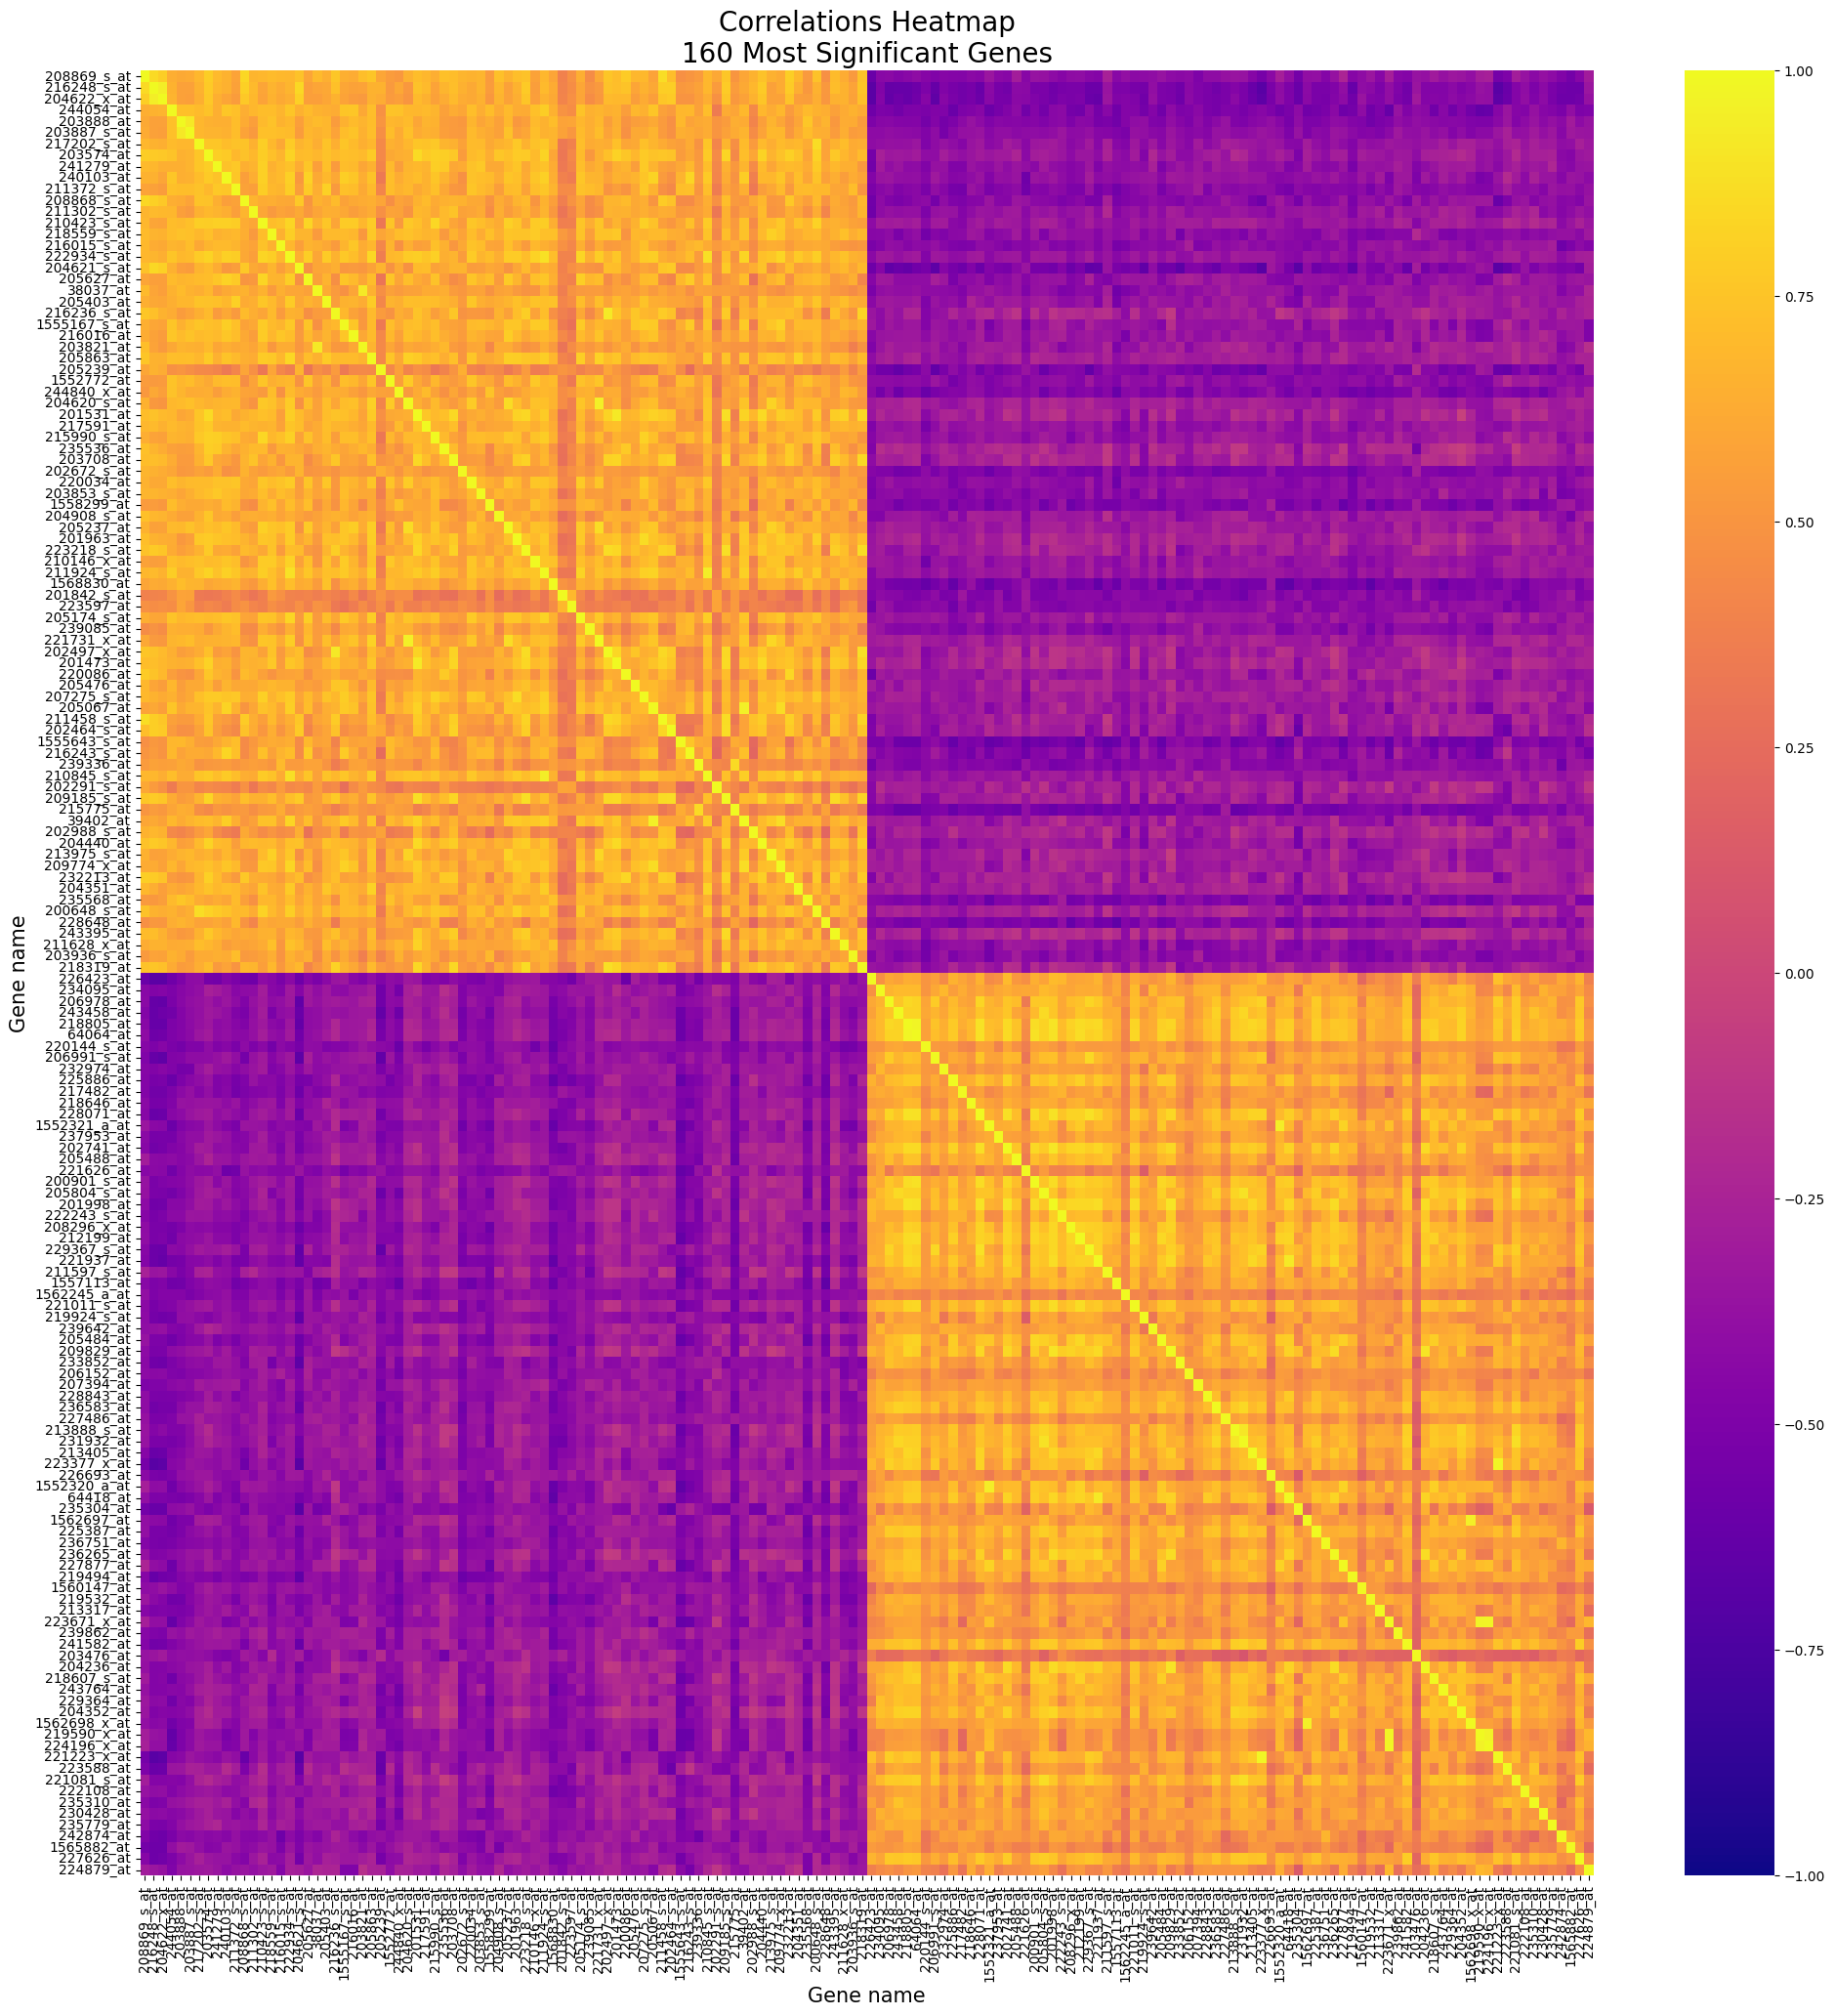

In [32]:
plt.figure(0, figsize = (24,24))
sns.heatmap(D_spearman_correlations_df, cmap="plasma", vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
plt.title('Correlations Heatmap\n160 Most Significant Genes', fontsize=20)
plt.xlabel('Gene name', fontsize=15)
plt.ylabel('Gene name', fontsize=15)
plt.show()

2. Under a NULL model that assumes genes are pairwise independent, the expected value for the Spearman correlation coefficient (𝜌) between any pair of genes would be 0. This is because independence between variables implies that there is no systematic relationship between them, and therefore no correlation.

2) Under a NULL model that assumes that genes are pairwise
independent, what is the expected value for ρ?

Under a NULL model that assumes that genes are pairwise independent the expected value for ρ would be close to 0.

In [33]:
# the excepted spearman value is the mean of all spearman values
spearman_mean = np.mean(D_spearman_correlations_df.mean())

curr_string = 'The spearman correlation mean of the D samples is ' + str(spearman_mean)
print(curr_string)

The spearman correlation mean of the D samples is 0.11713723901002733


3) Now compute the Spearman ρ correlations in all 80 choose 2
pairs from the overexpressed genes in D. Present your results
on a histogram. What is the average value you observed?
Compare it to the value in the above section. Explain.

In [34]:
# Number of genes
n = 80

D_only_overexpressed_df = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n)
D_spearman_correlations_only_overexpressed_df = df[D_only_overexpressed_df.index].corr(method='spearman')

D_spearman_correlations_only_overexpressed_df.shape

(80, 80)

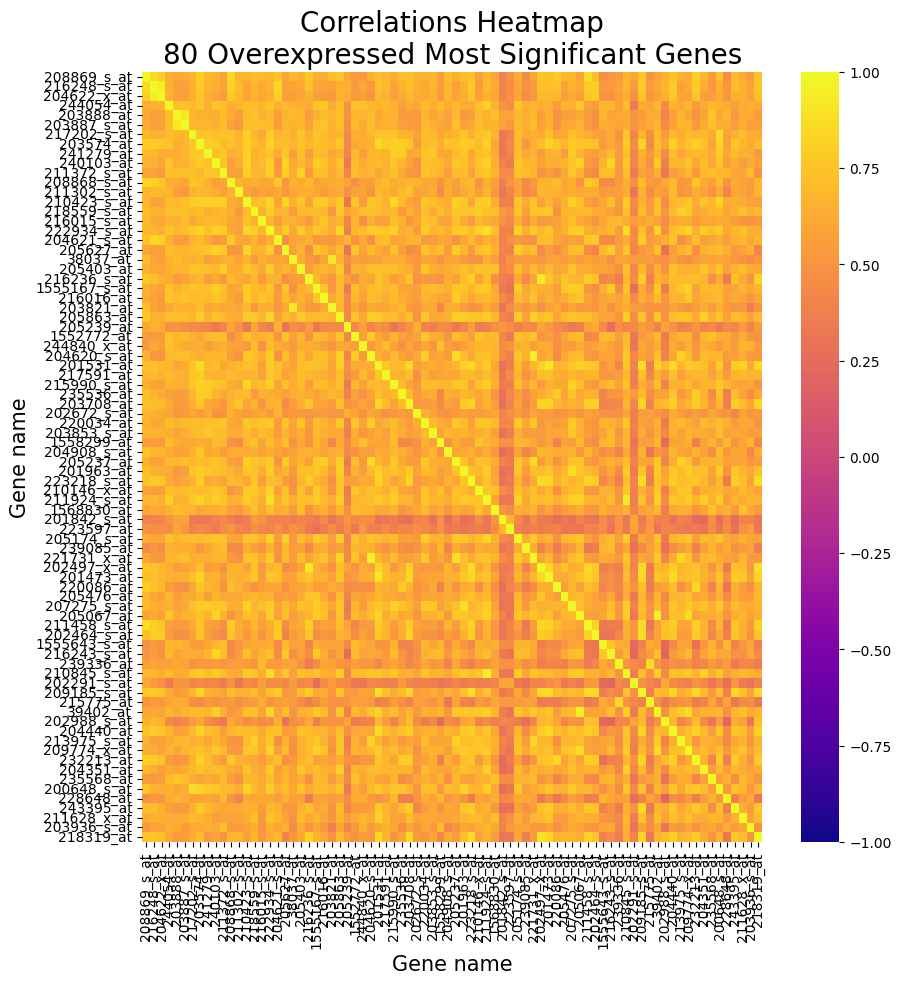

In [35]:
# First, we will plot a heatmap to show that these are indeed the overexpressed genese in D as shown before
plt.figure(0, figsize = (10,10))
sns.heatmap(D_spearman_correlations_only_overexpressed_df, cmap="plasma", vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
plt.title('Correlations Heatmap\n80 Overexpressed Most Significant Genes', fontsize=20)
plt.xlabel('Gene name', fontsize=15)
plt.ylabel('Gene name', fontsize=15)
plt.show()

In [36]:
# We dont want gene pairs to appear twice, so get only the bottom left triangle
spearman_correlations_list_unique_pairs_only_overexpressed = D_spearman_correlations_only_overexpressed_df.to_numpy()[np.tril_indices(n, k = -1)]

# Calculate spearman mean for the overexpressed genes only
mean_spearman_score = np.mean(spearman_correlations_list_unique_pairs_only_overexpressed)
print(f'mean spearman score for overexpressed only: {mean_spearman_score}')

mean spearman score for overexpressed only: 0.6099549475761084


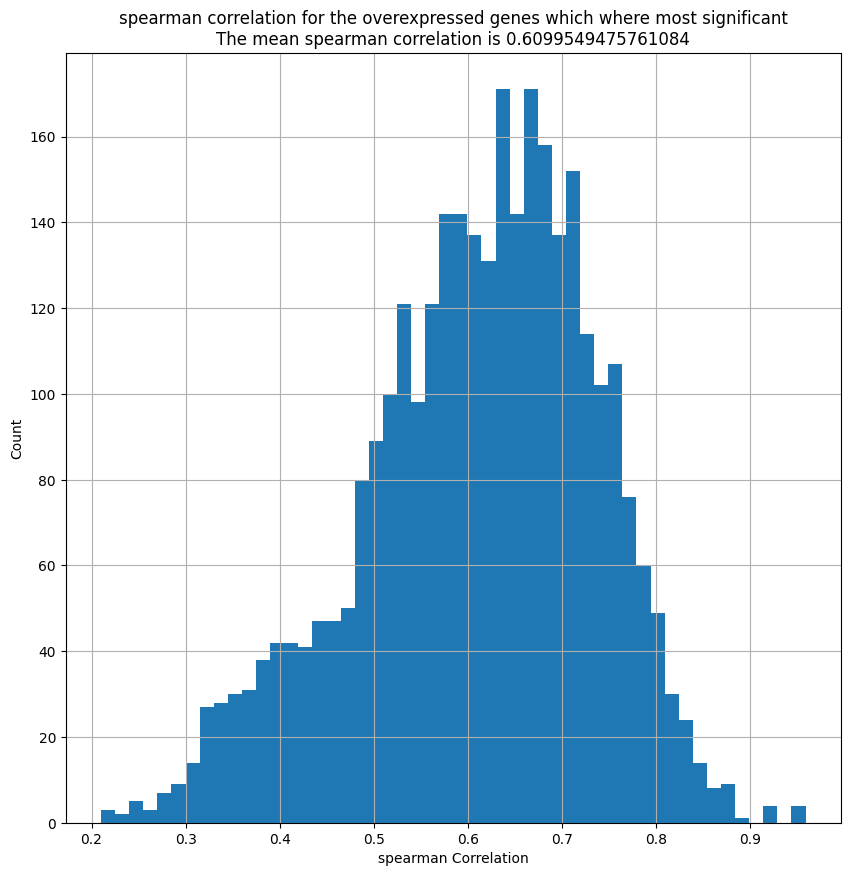

In [37]:
plt.figure(0, figsize = (10, 10))
plt.hist(spearman_correlations_list_unique_pairs_only_overexpressed, bins=50)
plt.title('spearman correlation for the overexpressed genes which where most significant\nThe mean spearman correlation is ' + str(mean_spearman_score))
plt.xlabel('spearman Correlation')
plt.ylabel('Count')
plt.grid()

We saw in the previous section that the mean of the most significant genes correlations' was supposed to be close to 0, yet we got 0.6 here.

This can be explained becuase here we only took into acount the correlations of over expressed genes paired with themselves , and we saw that they have positive correlations between themselvs.

the correlations of these genes with the under expressed genes which we have neglected be negative correlations - and so when averaging, they will cancel each other out.

please see the next parts of this question

3. The average Spearman correlation coefficient observed was 0.6. In the preceding section, we established that under a null model assuming pairwise independence among genes, the expected value for the Spearman correlation coefficient (𝜌) between any gene pair would be 0. However, upon examination of the histogram provided above, it becomes evident that the majority of correlation values exceed zero, suggesting an inherent relationship among the genes under examination. By computing the Spearman correlations across all 80 choose 2 pairs from the overexpressed genes in D—selected as the top 80 most significant genes from the WRS DE test—it becomes apparent that a positive correlation exists among the most significant overexpressed genes.


4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression
levels of genes, across a set of samples)?

In [38]:
# We dont want gene pairs to appear twice, so get only the bottom left triangle
spearman_correlations_list_unique_pairs = D_spearman_correlations_df.to_numpy()[np.tril_indices(2*n, k = -1)]

# Calculate spearman mean for the overexpressed genes only
mean_spearman_score = np.mean(spearman_correlations_list_unique_pairs)
print(f'mean spearman score: {mean_spearman_score}')

mean spearman score: 0.11158464302895829


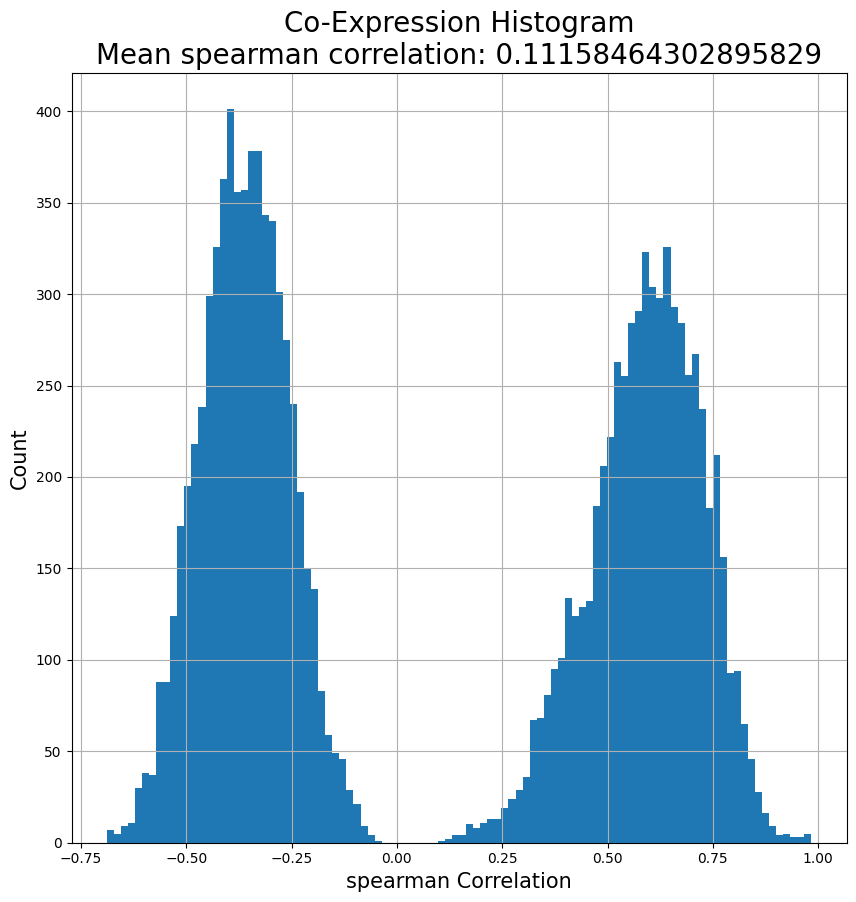

In [39]:
plt.figure(0, figsize = (10, 10))
plt.hist(spearman_correlations_list_unique_pairs, bins=100)
plt.title(f'Co-Expression Histogram\nMean spearman correlation: {mean_spearman_score}', fontsize=20)
plt.xlabel('spearman Correlation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid()
plt.show()

From the heatmap a few cell blocks above we can see that there is a strong positive co-expression among the overexpressed genes and also among the underexpressed genes.

In the histogram these are probably in the right gaussian
We expect that M's expression levels will be higher than H's. This might mean that there will be more will be concordant pairs.

And so, For (M, H) pairs we expect concordancy, and for (H, H) and (M, M) we expect less concordancy.

second answer <br>Min correlation coefficient between one gene from the overexpressed group to the 80 genes from the overexpressed group: 0.3903277674706246<br>
Max pvalue of the correlation between one gene from the overexpressed group to the 80 genes from the overexpressed group: 6.496055904309494e-05<br>
Max correlation coefficient between one gene from the overexpressed group to the 80 genes from the underexpressed group: -0.23445887445887445<br>
Max pvalue of the correlation between one gene from the overexpressed group to the 80 genes from the underexpressed group: 0.019498111096426754<br>
4. We can report that there is a positive correlation within each group of the 80 most significant genes (overexpressed and underexpressed genes), and there is a negative correlation between the overexpressed and the underexpressed groups.
For example, we can report the following: there are more than 80 pair genes with positive correlation from the overexpressed group with p_value less than 7*10^(-5), and there are more than 80 pair genes with negative correlation between the overexpressed to the underexpressed group with p_value less than 0.03.

5) What can you say about how many co-expressed pairs we
would observe (in the entire dataset) at FDR=0.05? Explain
your answer.

In [40]:
def get_spearman_correlations_and_pvalues(df: pd.DataFrame) -> dict:
    print(f'Computing spearman correlations and p-values...')
    result = dict()

    for gene1 in df.columns:
        for gene2 in df.columns:

            # Avoid replications between the same gene pairs
            if gene1 == gene2:
                continue
            if (gene1, gene2) in result.keys() or (gene2, gene1) in result.keys():
                continue

            # If we got here, this is not a duplicate
            corr_value, p_value = stats.spearmanr(df[gene1], df[gene2])
            result[(gene1, gene2)] = {'corr_value':corr_value, 'p_value':p_value}

    return result

def compute_fdr(sorted_pvals:list, fdr_threshold:float=0.05):
    """
    calculate FDR
    """
    print(f'Computing FDR...')
    N = len(sorted_pvals)
    max_amount_of_coexpressed_genes_with_fdr_below_threshold = 1
    for i, pval in enumerate(sorted_pvals, start=1):
        fdr = (pval * N) / i

        if fdr <= fdr_threshold:
            max_amount_of_coexpressed_genes_with_fdr_below_threshold = i

    return max_amount_of_coexpressed_genes_with_fdr_below_threshold

# Given threshold for fdr
fdr_threshold = 0.05


# Calculate p-values for coexpressed genes
spearman_correlations_and_pvalues = get_spearman_correlations_and_pvalues(most_significant_df)   #most_significant_df  #only_genes_df ->. only_genes_df = df.drop(columns=['Class','ID_REF'])
assert len(spearman_correlations_and_pvalues) == comb(160, 2, exact=True)

# Get pvals
coexpressed_pvals = np.array([value['p_value'] for key, value in spearman_correlations_and_pvalues.items() if value['corr_value'] > 0])  # consider adding condition: if value['corr_value'] > 0
sorted_coexpressed_pvals = np.sort(coexpressed_pvals)

# Compute FDR
max_amount_of_coexpressed_genes_with_fdr_below_threshold = compute_fdr(sorted_pvals=sorted_coexpressed_pvals, fdr_threshold=fdr_threshold)

print(f'There are {len(spearman_correlations_and_pvalues)} possible coexpressed pairs of genes from D')
print(f'We can report {max_amount_of_coexpressed_genes_with_fdr_below_threshold} coexpressed pairs of genes in FDR {fdr_threshold}')

Computing spearman correlations and p-values...
Computing FDR...
There are 12720 possible coexpressed pairs of genes from D
We can report 6291 coexpressed pairs of genes in FDR 0.05


second answer <br>
5. In order to formally answer this question, we would perform the following steps:
* Compute the Spearman correlations and p-values of all pairs in the entire dataset
* Sort the p-values results
* Iterate over the sorted p-values and for each index $i$ calculate the $FDR(i)$.
* Report the number of pairs $j$ such that $FDR(j) \leq 0.05$ and $FDR(j+1) \gt 0.05$

Since the entire dataset is large, it is difficult to compute the Spearman correlations for the full dataset. However, since we've already calculated the Spearman correlations for the subset samples D, we can approximately assume that they are the smallest p-values at the entire dataset and calculate the FDR on the results from the subset D:


In [41]:
# # 5. Computing FDR for subset D

# def compute_fdr(fdr_threshold, pvalues_df):
#   D_pairs_pvalues = []
#   pvalues_D = pvalues.reset_index().iloc[:, 1:]
#   pvalues_D.columns = pvalues_D.index.tolist()
#   pvalues_D_matrix = np.array(pvalues_D)
#   for i in range(pvalues_D_matrix.shape[0]):
#     for j in range(pvalues_D_matrix.shape[1]):
#       if i < j:
#         D_pairs_pvalues.append(pvalues_D_matrix[i][j])

#   D_pairs_pvalues_sorted = np.sort(D_pairs_pvalues)
#   N_samples = len(df_cleaned) # We consider N_samples as the size of the entire dataset
#   for i in range(len(D_pairs_pvalues_sorted) -1):
#     pval = D_pairs_pvalues_sorted[i]
#     next_pval = D_pairs_pvalues_sorted[i + 1]
#     fdr_i = (pval * N_samples) / (i+1)
#     fdr_i_p_1 = (next_pval * N_samples) / (i + 2)
#     if fdr_i <= fdr_threshold and fdr_i_p_1 > fdr_threshold:
#       return i

# fdr = compute_fdr(0.05, pvalues)
# print(fdr)

5. As we can see from the calculation above, if we approximately assume that the pvalues in the subset D are the smallest pvalues at the entire dataset, we can report that we would observe as least 11,588 pairs at FDR=0.05.


6) What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather than
only for genes in D?

Computing coexpression for all genes is similar to implementing a brute force approach - and so studying only the genes in D is equivalent to a more fine and samrt approach.

The main advantage of computing coexpression for all genes in the study comes from the exhaustive nature of looking into all possible different gene pairs - it is the most certain approach to finding every possible piece of information regariding the data. This way we can reveal all correlations, and potentially find interesting, strongly correlated pairs that are not necessairily in our over and under expressed samples in "D". It is inevidable that when looking into a smaller subset of the data, information is lost in the process.

The main disadvantage of computing coexpression for all genes in the study is the major time and computing power complexity of the process. The number of pairs is in order of magnitude of $|genes|^2$
 which is ~ 54000^2 =~ 3 Billion pairs . This obviously means it will take a lot of time or alot of computing power to generate and process all of the information. We also note that For all pairs - with such high numbers we can get many high correlations, just by chance.

second answer <br> 6) Computing co-expression for all genes in the study, as opposed to only for genes in D, comes with its own set of advantages and disadvantages:

Advantages:

Comprehensive Understanding: Analyzing co-expression for all genes provides a more comprehensive understanding of the relationships among genes in the study. It allows for the identification of potential regulatory networks, functional modules, and biological pathways involving a broader set of genes.

Discovery of Novel Relationships: Examining co-expression across the entire genome may uncover novel relationships and interactions between genes that were not initially considered or known. This can lead to new hypotheses and insights into biological processes and disease mechanisms.

Disadvantages:

Increased Computational Burden: Computing co-expression for all genes in the study involves analyzing a much larger number of gene pairs, leading to increased computational complexity and resource requirements. This can be particularly challenging for large-scale datasets or when computational resources are limited.

Noise and False Discoveries: Analyzing co-expression for all genes may lead to the detection of spurious correlations or false positives due to noise in the data or chance associations. Without proper correction for multiple testing, it may be difficult to distinguish true biological relationships from random fluctuations.

e. Plots and Conclusions of the DE and correlation analysis<br>
1) Construct the DE overabundance plots (blue and green lines
as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the results
you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which
we observe with an FDR threshold of:<br>
a) $\tau$ = 0.05
b) $\tau$ = 0.01
c) $\tau$ = 0.005<br>
If these events are not observed at any k>0, then make that
statement.

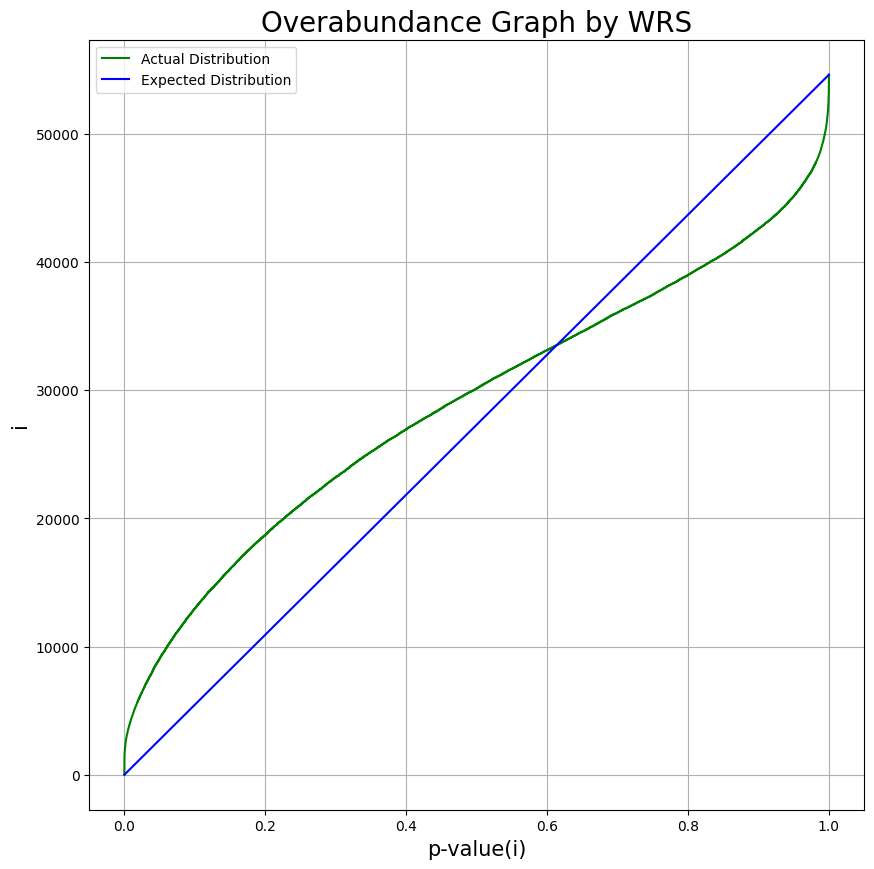

In [42]:
def overabundance_graph(pvals, title):
    """
    generate FDR plot
    """
    # Prepare the plot
    N = len(pvals)
    x_actual = np.sort(pvals)
    x_expected = np.linspace(0, 1.0, N)
    y = np.arange(N)

    #Plot overabundance
    plt.figure(0, figsize = (10, 10))
    plt.grid()
    plt.title(f"Overabundance Graph by {title}", fontsize=20)
    plt.xlabel("p-value(i)", fontsize=15)
    plt.ylabel("i", fontsize=15)
    plt.plot(x_actual, y, color='g', label='Actual Distribution')
    plt.plot(x_expected, y, color='b', label='Expected Distribution')
    plt.legend()

# Note: we want a one-sided pval. and so, adjust to the wanted side of the statistic
WRS_df['p-value'] = WRS_df['p-value'] / 2

opposite_side_mask = WRS_df['WRS Z Value'] < 0
WRS_df['p-value'][opposite_side_mask] = 1 - WRS_df['p-value'][opposite_side_mask]

# Plot the overabundance graph
overabundance_graph(pvals=WRS_df['p-value'], title='WRS')

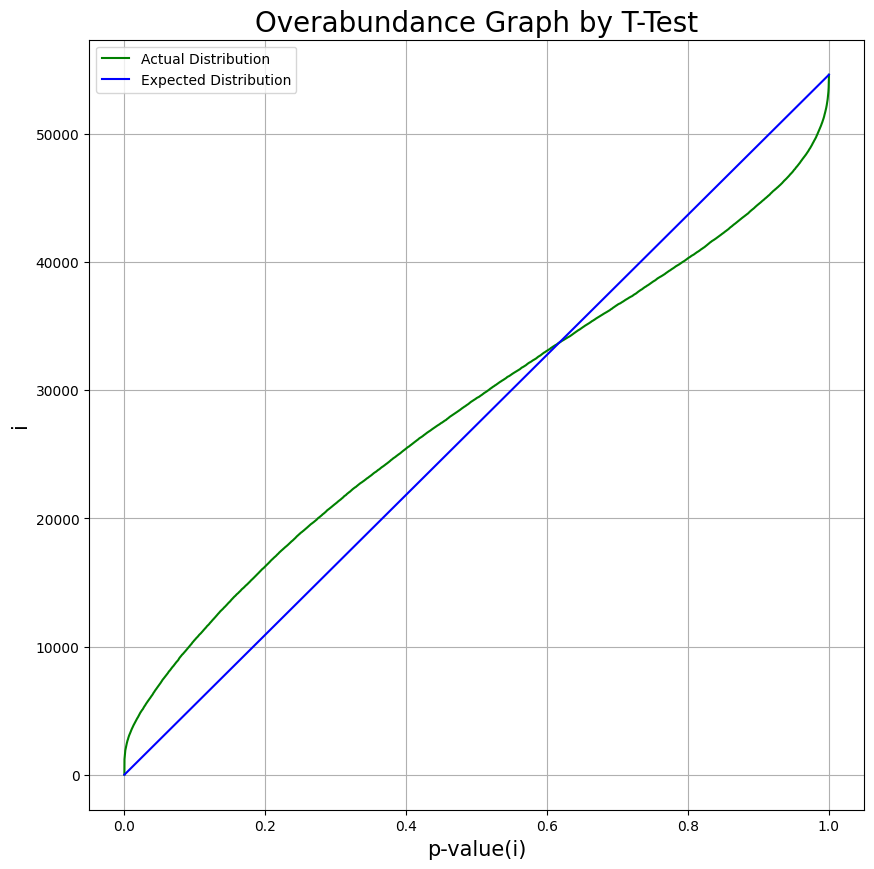

In [43]:
# Note: we want a one-sided pval. and so, adjust to the wanted side of the statistic
t_test_df['p-value'] = t_test_df['p-value'] / 2

opposite_side_mask = t_test_df['t_test'] < 0
t_test_df['p-value'][opposite_side_mask] = 1 - t_test_df['p-value'][opposite_side_mask]

# Plot the overabundance graph
overabundance_graph(pvals=t_test_df['p-value'], title='T-Test')

In [44]:
result_list = []
for pvals, test_type in [(t_test_df['p-value'], 'T-test'), (WRS_df['p-value'], 'WRS')]:
    print(test_type)
    data_frame_value_list = []
    sorted_pvals = np.sort(pvals)
    for fdr in [0.05, 0.01, 0.005]:
        curr_report = compute_fdr(sorted_pvals=sorted_pvals, fdr_threshold=fdr)
        data_frame_value_list.append([test_type, curr_report, fdr])
    score_df  = pd.DataFrame(data_frame_value_list, columns = ['test_type','number of genes', 'fdr score'])
    result_list.append(score_df)
result_list

T-test
Computing FDR...
Computing FDR...
Computing FDR...
WRS
Computing FDR...
Computing FDR...
Computing FDR...


[  test_type  number of genes  fdr score
 0    T-test             2104      0.050
 1    T-test             1305      0.010
 2    T-test             1104      0.005,
   test_type  number of genes  fdr score
 0       WRS             2808      0.050
 1       WRS             1601      0.010
 2       WRS             1323      0.005]

In [45]:
T_test_result = result_list[0]
T_test_result

,test_type,number of genes,fdr score
0,T-test,2104,0.050
1,T-test,1305,0.010
2,T-test,1104,0.005


In [46]:
WRS_results = result_list[1]
WRS_results

,test_type,number of genes,fdr score
0,WRS,2808,0.050
1,WRS,1601,0.010
2,WRS,1323,0.005


2) For any given gene, g, consider the following set of p-values:
𝑆(𝑔) = -𝑝(𝜆)| 𝑝(𝜆) 𝑖𝑠 𝑎 𝑊𝑅𝑆 𝑝 − 𝑣𝑎𝑙𝑢𝑒
𝑓𝑜𝑟 𝑜𝑣𝑒𝑟𝑒𝑥𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛 𝑖𝑛 𝑀
𝑎𝑓𝑡𝑒𝑟 𝑠𝑤𝑎𝑝𝑝𝑖𝑛𝑔 𝑜𝑛𝑒 𝑙𝑎𝑏𝑒𝑙E
(In the above definition 𝜆 represents a label swap – there are
99 such swaps).
Let
𝑝!(𝑔) = max
"
𝑆(𝑔)
In words: 𝑝!(𝑔) represents the maximum p-value that could
have been obtained for g, assuming a single labeling error.
a) For all genes, compute 𝑝!(𝑔).
b) Run the FDR procedure with 𝜏 = 0.05 using 𝑝!(𝑔)
(instead of the original p-values as computed in
section 3e1a above). How many genes can you report
now?
c) What is the intersection of the genes you can report
above with the results of 3e1a. Explain.
Comment: The process you ran in this section yields a set
of genes called Robust Differentially Expressed Genes
(RDEG).

In [47]:


swapped_over_p_val_wrs = {}

df_copy = df.copy()

for swap in range(99):
  df_copy['Class'].iloc[swap] = 'H' if df_copy['Class'].iloc[swap] =='M' else 'M'

  h_val_swap = df_copy['Class'] == 'H'
  m_val_swap = df_copy['Class'] == 'M'

  h_val_swap = h_val_swap.apply(pd.to_numeric,errors='coerce')
  m_val_swap = m_val_swap.apply(pd.to_numeric,errors='coerce')
  for gene in h_val_swap.index:
    rank_stat, p_value_rank = stats.ranksums(m_val_swap.loc[gene],h_val_swap.loc[gene])


    if rank_stat > 0:
      if gene not in swapped_over_p_val_wrs:
        swapped_over_p_val_wrs[gene] = p_value_rank
      else:
        swapped_over_p_val_wrs[gene] = max(p_value_rank,swapped_over_p_val_wrs[gene])

  df_copy['Class'].iloc[swap] = 'H' if df_copy['Class'].iloc[swap] =='M' else 'M'

print(len(swapped_over_p_val_wrs))



<ipython-input-47-6683a935fa59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Class'].iloc[swap] = 'H' if df_copy['Class'].iloc[swap] =='M' else 'M'
<ipython-input-47-6683a935fa59>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Class'].iloc[swap] = 'H' if df_copy['Class'].iloc[swap] =='M' else 'M'


99


In [48]:
t_test_df_pg = df_copy.iloc[:,2:].apply(calculate_t_test, axis=0, result_type='expand')
t_test_df_pg.index=['t_test', 'p-value']
t_test_df_pg = t_test_df_pg.T
t_test_df_pg

WRS_df_pg = df_copy.iloc[:,2:].apply(calculate_WRS, axis=0, result_type='expand')
WRS_df_pg.index=['WRS Z Value', 'p-value']
WRS_df_pg_copy = WRS_df_pg.copy()
WRS_df_pg = WRS_df_pg.T
WRS_df_pg

result_list = []
for pvals, test_type in [(t_test_df_pg['p-value'], 'T-test'), (WRS_df_pg['p-value'], 'WRS')]:
    print(test_type)
    data_frame_value_list = []
    sorted_pvals = np.sort(pvals)
    for fdr in [0.05, 0.01, 0.005]:
        curr_report = compute_fdr(sorted_pvals=sorted_pvals, fdr_threshold=fdr)
        data_frame_value_list.append([test_type, curr_report, fdr])
    score_df  = pd.DataFrame(data_frame_value_list, columns = ['test_type','number of genes', 'fdr score'])
    result_list.append(score_df)
result_list

T-test
Computing FDR...
Computing FDR...
Computing FDR...
WRS
Computing FDR...
Computing FDR...
Computing FDR...


[  test_type  number of genes  fdr score
 0    T-test             3970      0.050
 1    T-test             1987      0.010
 2    T-test             1588      0.005,
   test_type  number of genes  fdr score
 0       WRS             6678      0.050
 1       WRS             3170      0.010
 2       WRS             2377      0.005]

we get more genes

3) Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation of
their expression patterns that demonstrates the observed DE.

In [49]:
# We will choose the genes from the  "most significant df" we constructed earlier. brought hee again as a reminder
most_significant_df  = pd.concat([overexpressed_n_significant_df, underexpressed_n_significant_df])
D_new = most_significant_df.sample(n=3)
D_new = df[D_new.index]
D_new

,218559_s_at,217482_at,225387_at
1,8.035381,10.825514,9.800095
2,9.717929,10.369813,9.686690
3,4.209928,9.743438,9.292718
4,5.528213,10.496512,9.704303
5,6.652384,10.864731,9.253184
...,...,...,...
95,8.403144,7.583890,4.960631
96,10.708406,9.002182,7.931838
97,10.293520,10.927354,7.077358
98,10.400606,11.027761,9.322463


<ipython-input-50-bf0f04d90ce8>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g[M_samples], shade=True, label='M')
<ipython-input-50-bf0f04d90ce8>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g[H_samples], shade=True, label='H')


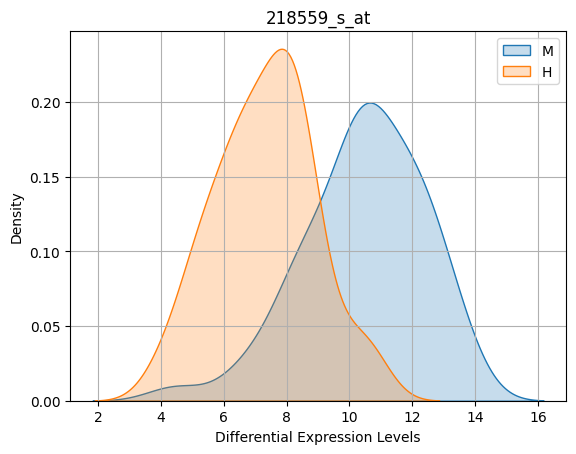

<ipython-input-50-bf0f04d90ce8>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g[M_samples], shade=True, label='M')
<ipython-input-50-bf0f04d90ce8>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g[H_samples], shade=True, label='H')


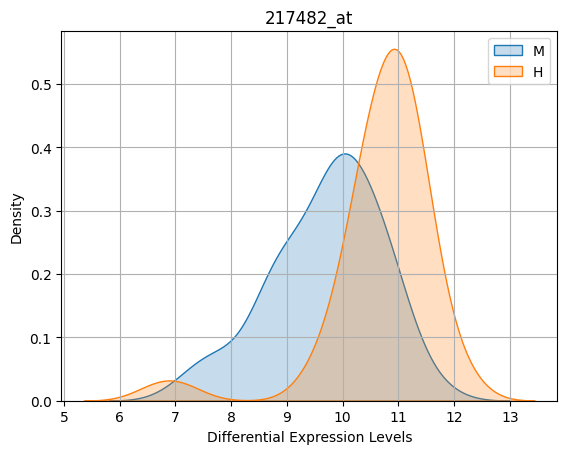

<ipython-input-50-bf0f04d90ce8>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g[M_samples], shade=True, label='M')
<ipython-input-50-bf0f04d90ce8>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g[H_samples], shade=True, label='H')


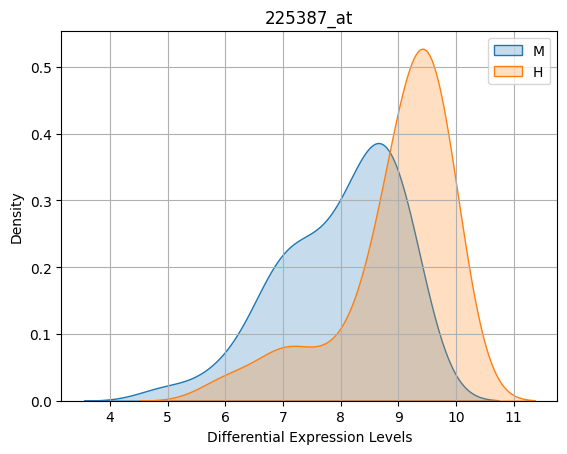

0
218559_s_at    None
217482_at      None
225387_at      None
dtype: object

In [50]:
def plot_expression_patterns(g):
    """
    Plot differential expression (DE) values observed for each gene in H vs M
    """
    M_samples = df['Class'] == 'M'
    H_samples = df['Class'] == 'H'
    sns.kdeplot(g[M_samples], shade=True, label='M')
    sns.kdeplot(g[H_samples], shade=True, label='H')
    plt.title(g.name)
    plt.xlabel('Differential Expression Levels')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()
    return
D_new.apply(plot_expression_patterns, axis=0)

4) Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.

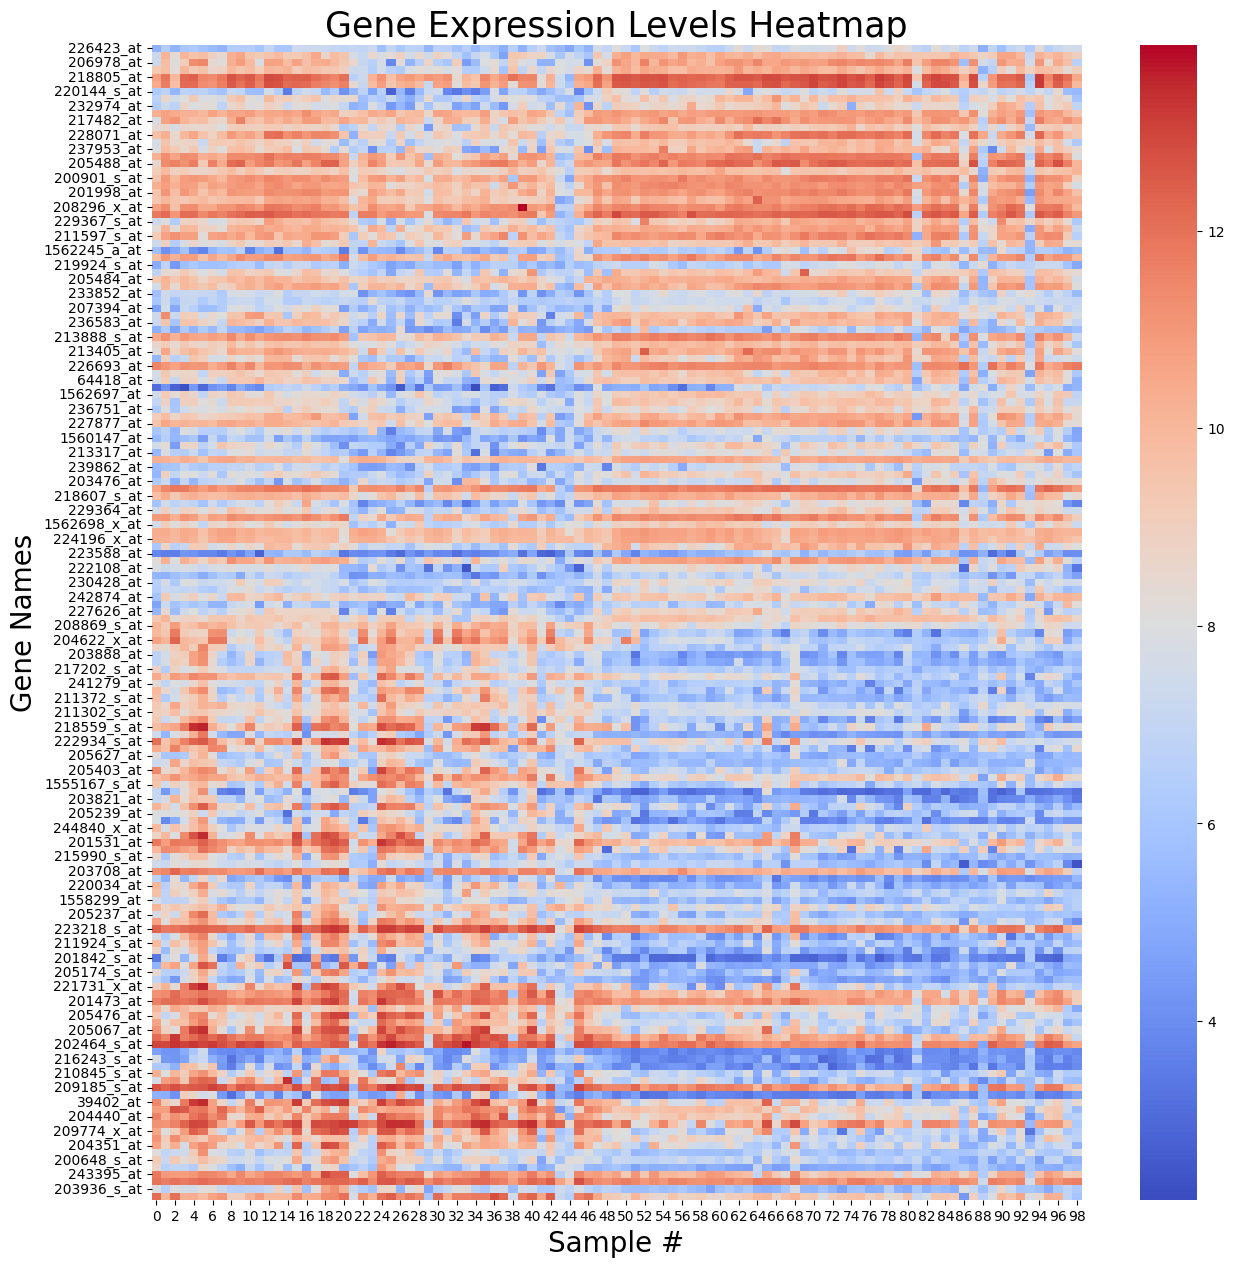

In [51]:
# slice original dataframe by expression
overexpressed = df[overexpressed_n_significant_df.index]
underexpressed = df[underexpressed_n_significant_df.index]

# slice by healthy and ill patients
H_overexpressed = overexpressed.T[df[df['Class'] == 'H'].index]
H_underexpressed = underexpressed.T[df[df['Class'] == 'H'].index]
M_overexpressed = overexpressed.T[df[df['Class'] == 'M'].index]
M_underexpressed = underexpressed.T[df[df['Class'] == 'M'].index]

# reorder the matrix
upper_genes_for_matrix = pd.concat([M_underexpressed, H_underexpressed], axis=1, ignore_index=True)
lower_genes_for_matrix = pd.concat([M_overexpressed, H_overexpressed], axis=1, ignore_index=True)
all_genes_for_matrix = pd.concat([upper_genes_for_matrix, lower_genes_for_matrix])

# plot figure
plt.figure(0, figsize = (15, 15))
sns.heatmap(all_genes_for_matrix, cmap="coolwarm")
plt.title('Gene Expression Levels Heatmap', fontsize=25)
plt.xlabel('Sample #', fontsize=20)
plt.ylabel('Gene Names', fontsize=20)
plt.show()